In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [29]:
tokenizer = Tokenizer()
data = "In the town of Athy one Jeremy Lanigan battered away till he hadnt a pound. \nhis father he died and made him a man again. \nleft a farm with ten acres of ground. \nhe gave a grand party for friends a relations who did not forget him when come to the will and if you'll but listen I'll make you're eyes glisten of rows and ructions at Lanigan's Ball. \nsix long months I spent in Dublin. \nsix long months doing nothin' at all. \nsix long months I spent in Dublin. \nlearning to dance for Lanigan's Ball. \nI stepped out I stepped in again. \nI stepped out I stepped in again. \nI stepped out I stepped in again. \nlearning to dance for Lanigan's Ball. \nMyself to be sure got free invitaions for all the nice boys and girls I did ask in less than 10 minutes the friends and relations were dancing as merry as bee 'round a cask. \nThere was lashing of punch and wine for the ladies potatoes and cakes there was bacon a tay. \nthere were the O'Shaughnessys, Murphys, Walshes, O'Gradys courtin' the girls and dancing away. \nthey were doing all kinds of nonsensical polkas all 'round the room in a whirly gig but Julia and I soon banished their nonsense and tipped them a twist of a real Irish jig Oh how that girl got mad on me and danced till you'd think the ceilings would fall for I spent three weeks at Brook's academy learning to dance for Lanigan's Ball CHORUS. \nThe boys were all merry the girls were all hearty dancing away in couples and groups till an accident happened young Terrance McCarthy put his right leg through Miss Finerty's hoops. \nThe creature she fainted and cried 'melia murder' cried for her brothers and gathered them all Carmody swore that he'd go no further till he'd have satisfaction at Lanigan's Ball. \nIn the midst of the row Miss Kerrigan faintedher cheeks at the same time as red as a rose some of the boys decreed she was painted. \nshe took a wee drop too much I suppose Her sweetheart Ned Morgan all powerful and able when he saw his fair colleen stretched out by the wall. \nhe tore the left leg from under the table and smashed all the dishes at Lanigan's Ball CHORUS. \nBoy oh Boys tis then there was ructions myself got a kick from big Phelam McHugh but soon I replied to this kind introduction and kicked up a terrible hullaballoo old Casey the piper was near being strangled. \nthey squeezed up his pipes bellows chanters and all the girls in their ribbons they all got entangled and that put an end to Lanigan's Ball CHORUS"
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'a': 3, 'i': 4, 'in': 5, 'all': 6, 'of': 7, 'for': 8, 'to': 9, "lanigan's": 10, 'ball': 11, 'at': 12, 'stepped': 13, 'he': 14, 'were': 15, 'was': 16, 'till': 17, 'his': 18, 'again': 19, 'out': 20, 'got': 21, 'boys': 22, 'girls': 23, 'as': 24, 'there': 25, 'away': 26, 'but': 27, 'six': 28, 'long': 29, 'months': 30, 'spent': 31, 'learning': 32, 'dance': 33, 'dancing': 34, 'they': 35, 'that': 36, 'chorus': 37, 'she': 38, 'him': 39, 'left': 40, 'friends': 41, 'relations': 42, 'did': 43, 'when': 44, 'ructions': 45, 'dublin': 46, 'doing': 47, 'myself': 48, 'merry': 49, "'round": 50, 'soon': 51, 'their': 52, 'them': 53, 'oh': 54, 'an': 55, 'put': 56, 'leg': 57, 'miss': 58, 'cried': 59, 'her': 60, "he'd": 61, 'from': 62, 'up': 63, 'town': 64, 'athy': 65, 'one': 66, 'jeremy': 67, 'lanigan': 68, 'battered': 69, 'hadnt': 70, 'pound': 71, 'father': 72, 'died': 73, 'made': 74, 'man': 75, 'farm': 76, 'with': 77, 'ten': 78, 'acres': 79, 'ground': 80, 'gave': 81, 'grand': 82, 'par

In [30]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i+1]
        input_sequences.append(n_gram_sequence)

In [31]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [32]:
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [14]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

2
17
24
6
25
26
27
28


In [33]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  5  1 64  7 65 66 67]


In [34]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  5  1 64  7 65 66]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'i': 4, 'in': 5, 'all': 6, 'of': 7, 'for': 8, 'to': 9, "lanigan's": 10, 'ball': 11, 'at': 12, 'stepped': 13, 'he': 14, 'were': 15, 'was': 16, 'till': 17, 'his': 18, 'again': 19, 'out': 20, 'got': 21, 'boys': 22, 'girls': 23, 'as': 24, 'there': 25, 'away': 26, 'but': 27, 'six': 28, 'long': 29, 'months': 30, 'spent': 31, 'learning': 32, 'dance': 33, 'dancing': 34, 'they': 35, 'that': 36, 'chorus': 37, 'she': 38, 'him': 39, 'left': 40, 'friends': 41, 'relations': 42, 'did': 43, 'when': 44, 'ructions': 45, 'dublin': 46, 'doing': 47, 'myself': 48, 'merry': 49, "'round": 50, 'soon': 51, 'their': 52, 'them': 53, 'oh': 54, 'an': 55, 'put': 56, 'leg': 57, 'miss': 58, 'cried': 59, 'her': 60, "he'd": 61, 'from': 62, 'up': 63, 'town': 64, 'athy': 65, 'one': 66, 'jeremy': 67, 'lanigan': 68, 'battered': 69, 'hadnt': 70, 'pound': 71, 'father': 72, 'died': 73, 'made': 74, 'man': 75, 'farm': 76, 'with': 77, 'ten': 78, 'acres': 79, 'ground': 80, 'gave': 81, 'grand': 82, 'par

In [37]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Train on 431 samples
Epoch 1/500
431/431 [==============================] - 3s 7ms/sample - loss: 5.4758 - accuracy: 0.0209
Epoch 2/500
431/431 [==============================] - 0s 606us/sample - loss: 5.4578 - accuracy: 0.0348
Epoch 3/500
431/431 [==============================] - 0s 614us/sample - loss: 5.4198 - accuracy: 0.0394
Epoch 4/500
431/431 [==============================] - 0s 635us/sample - loss: 5.2907 - accuracy: 0.0348
Epoch 5/500
431/431 [==============================] - 0s 605us/sample - loss: 5.1458 - accuracy: 0.0325
Epoch 6/500
431/431 [==============================] - 0s 608us/sample - loss: 5.0853 - accuracy: 0.0464
Epoch 7/500
431/431 [==============================] - 0s 611us/sample - loss: 5.0433 - accuracy: 0.0464
Epoch 8/500
431/431 [==============================] - 0s 601us/sample - loss: 5.0213 - accuracy: 0.0464
Epoch 9/500
431/431 [==============================] - 0s 602us/sample - loss: 4.9954 - accuracy: 0.0487
Epoch 10/500
431/431 [==============

431/431 [==============================] - 0s 597us/sample - loss: 2.6398 - accuracy: 0.4571
Epoch 79/500
431/431 [==============================] - 0s 580us/sample - loss: 2.6160 - accuracy: 0.4640
Epoch 80/500
431/431 [==============================] - 0s 626us/sample - loss: 2.5891 - accuracy: 0.4687
Epoch 81/500
431/431 [==============================] - 0s 610us/sample - loss: 2.5657 - accuracy: 0.4664
Epoch 82/500
431/431 [==============================] - 0s 587us/sample - loss: 2.5424 - accuracy: 0.4548
Epoch 83/500
431/431 [==============================] - 0s 583us/sample - loss: 2.5146 - accuracy: 0.4756
Epoch 84/500
431/431 [==============================] - 0s 592us/sample - loss: 2.4893 - accuracy: 0.4896
Epoch 85/500
431/431 [==============================] - 0s 582us/sample - loss: 2.4667 - accuracy: 0.4942
Epoch 86/500
431/431 [==============================] - 0s 589us/sample - loss: 2.4444 - accuracy: 0.5058
Epoch 87/500
431/431 [==============================] - 0s 

431/431 [==============================] - 0s 607us/sample - loss: 1.2796 - accuracy: 0.8237
Epoch 155/500
431/431 [==============================] - 0s 615us/sample - loss: 1.2649 - accuracy: 0.8237
Epoch 156/500
431/431 [==============================] - 0s 600us/sample - loss: 1.2595 - accuracy: 0.8399
Epoch 157/500
431/431 [==============================] - 0s 639us/sample - loss: 1.2402 - accuracy: 0.8445
Epoch 158/500
431/431 [==============================] - 0s 596us/sample - loss: 1.2316 - accuracy: 0.8469
Epoch 159/500
431/431 [==============================] - 0s 583us/sample - loss: 1.2177 - accuracy: 0.8445
Epoch 160/500
431/431 [==============================] - 0s 594us/sample - loss: 1.2094 - accuracy: 0.8445
Epoch 161/500
431/431 [==============================] - 0s 598us/sample - loss: 1.1975 - accuracy: 0.8445
Epoch 162/500
431/431 [==============================] - 0s 604us/sample - loss: 1.1896 - accuracy: 0.8538
Epoch 163/500
431/431 [============================

431/431 [==============================] - 0s 615us/sample - loss: 0.6293 - accuracy: 0.9536
Epoch 231/500
431/431 [==============================] - 0s 619us/sample - loss: 0.6268 - accuracy: 0.9582
Epoch 232/500
431/431 [==============================] - 0s 608us/sample - loss: 0.6197 - accuracy: 0.9536
Epoch 233/500
431/431 [==============================] - 0s 615us/sample - loss: 0.6128 - accuracy: 0.9559
Epoch 234/500
431/431 [==============================] - 0s 637us/sample - loss: 0.6103 - accuracy: 0.9536
Epoch 235/500
431/431 [==============================] - 0s 625us/sample - loss: 0.6070 - accuracy: 0.9606
Epoch 236/500
431/431 [==============================] - 0s 599us/sample - loss: 0.6025 - accuracy: 0.9536
Epoch 237/500
431/431 [==============================] - 0s 600us/sample - loss: 0.5946 - accuracy: 0.9582
Epoch 238/500
431/431 [==============================] - 0s 600us/sample - loss: 0.5885 - accuracy: 0.9652
Epoch 239/500
431/431 [============================

431/431 [==============================] - 0s 591us/sample - loss: 0.3343 - accuracy: 0.9861
Epoch 307/500
431/431 [==============================] - 0s 596us/sample - loss: 0.3317 - accuracy: 0.9861
Epoch 308/500
431/431 [==============================] - 0s 599us/sample - loss: 0.3296 - accuracy: 0.9861
Epoch 309/500
431/431 [==============================] - 0s 597us/sample - loss: 0.3259 - accuracy: 0.9838
Epoch 310/500
431/431 [==============================] - 0s 599us/sample - loss: 0.3238 - accuracy: 0.9814
Epoch 311/500
431/431 [==============================] - 0s 608us/sample - loss: 0.3217 - accuracy: 0.9861
Epoch 312/500
431/431 [==============================] - 0s 611us/sample - loss: 0.3188 - accuracy: 0.9861
Epoch 313/500
431/431 [==============================] - 0s 618us/sample - loss: 0.3161 - accuracy: 0.9861
Epoch 314/500
431/431 [==============================] - 0s 591us/sample - loss: 0.3142 - accuracy: 0.9861
Epoch 315/500
431/431 [============================

431/431 [==============================] - 0s 589us/sample - loss: 0.1924 - accuracy: 0.9861
Epoch 383/500
431/431 [==============================] - 0s 584us/sample - loss: 0.1912 - accuracy: 0.9861
Epoch 384/500
431/431 [==============================] - 0s 589us/sample - loss: 0.1899 - accuracy: 0.9861
Epoch 385/500
431/431 [==============================] - 0s 605us/sample - loss: 0.1888 - accuracy: 0.9838
Epoch 386/500
431/431 [==============================] - 0s 611us/sample - loss: 0.1871 - accuracy: 0.9814
Epoch 387/500
431/431 [==============================] - 0s 621us/sample - loss: 0.1857 - accuracy: 0.9861
Epoch 388/500
431/431 [==============================] - 0s 626us/sample - loss: 0.1846 - accuracy: 0.9838
Epoch 389/500
431/431 [==============================] - 0s 634us/sample - loss: 0.1832 - accuracy: 0.9861
Epoch 390/500
431/431 [==============================] - 0s 614us/sample - loss: 0.1825 - accuracy: 0.9838
Epoch 391/500
431/431 [============================

431/431 [==============================] - 0s 610us/sample - loss: 0.1247 - accuracy: 0.9861
Epoch 459/500
431/431 [==============================] - 0s 593us/sample - loss: 0.1239 - accuracy: 0.9861
Epoch 460/500
431/431 [==============================] - 0s 587us/sample - loss: 0.1229 - accuracy: 0.9838
Epoch 461/500
431/431 [==============================] - 0s 609us/sample - loss: 0.1225 - accuracy: 0.9861
Epoch 462/500
431/431 [==============================] - 0s 613us/sample - loss: 0.1217 - accuracy: 0.9814
Epoch 463/500
431/431 [==============================] - 0s 604us/sample - loss: 0.1210 - accuracy: 0.9838
Epoch 464/500
431/431 [==============================] - 0s 598us/sample - loss: 0.1206 - accuracy: 0.9861
Epoch 465/500
431/431 [==============================] - 0s 630us/sample - loss: 0.1200 - accuracy: 0.9861
Epoch 466/500
431/431 [==============================] - 0s 598us/sample - loss: 0.1189 - accuracy: 0.9838
Epoch 467/500
431/431 [============================

In [38]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show

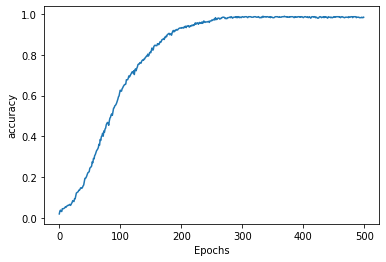

In [39]:
plot_graphs(history, 'accuracy');

In [40]:
seed_text = 'Laurence went to dublin'
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' ' + output_word
print(seed_text)

Laurence went to dublin stepped out i stepped in again in dublin did ask in less than 10 minutes the friends and relations were dancing as merry as bee 'round a cask as cask as bee 'round a cask cask cask merry a real jig oh how that girl got mad on me and danced till you'd think the ceilings would fall for i spent three weeks at brook's academy learning to dance for lanigan's ball chorus chorus chorus chorus chorus the chorus the ceilings would fall for i spent three weeks at brook's academy learning to dance for lanigan's ball chorus chorus chorus
